In [35]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timezone


In [7]:
def fixup_time(col) :
    return col.map(lambda t: datetime.fromtimestamp(t / 1000.))

def read_all_plant_data_csv(pattern, plants):
    for filename in glob.glob(pattern):
        df = pd.read_csv(filename)
        df = pd.merge(left=df, right=plants, how='inner', on='stationCode')
        df['collectTime'] = fixup_time(df['collectTime'])
        yield df


In [14]:
plants = pd.read_csv('out/plants.csv')
plants = plants[['stationCode', 'stationName', 'capacity']]

hourly = pd.concat(read_all_plant_data_csv('out/hourly_*.csv', plants))
daily = pd.concat(read_all_plant_data_csv('out/daily_*.csv', plants))
monthly = pd.concat(read_all_plant_data_csv('out/monthly_*.csv', plants))
yearly = pd.concat(read_all_plant_data_csv('out/yearly.csv', plants))

hourly

,radiation_intensity,theory_power,inverter_power,ongrid_power,power_profit,stationCode,collectTime,stationName,capacity
0,0.6968,17559.36,18330,18330.0,34320,5D02E8B40AD342159AC8D8A2BCD4FAB5,2017-08-04 18:00:00,test1,0.0
1,0.7968,17159.36,15330,15330.0,31320,5D02E8B40AD342159AC8D8A2BCD4FAB5,2017-08-04 19:00:00,test1,0.0
2,0.8968,17859.36,16630,17330.0,39320,5D02E8B40AD342159AC8D8A2BCD4FAB5,2017-08-04 22:00:00,test1,0.0
3,0.7568,19859.36,16730,16730.0,38370,5D02E8B40AD342159AC8D8A2BCD4FAB5,2017-08-05 00:00:00,test1,0.0
4,0.6568,20859.36,18730,19730.0,39370,5D02E8B40AD342159AC8D8A2BCD4FAB5,2017-08-05 01:00:00,test1,0.0
5,1.4123,659.60,18330,NaN,2088,BA4372D08E014822AB065017416F254C,2017-08-04 21:00:00,test2,0.0
6,1.5123,679.60,16330,NaN,2128,BA4372D08E014822AB065017416F254C,2017-08-05 01:00:00,test2,0.0


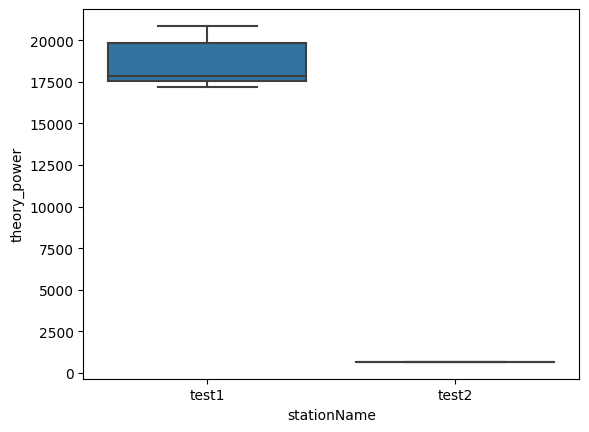

In [40]:
sns.boxplot(x=hourly['stationName'], y=hourly['theory_power'])
plt.show()
